In [3]:
# 图像分类：tensorflow2
# 1. 获取数据集
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = \
tf.keras.datasets.fashion_mnist.load_data()

In [4]:
!ls

1-s2.0-S0167732222024916-mmc1.docx
amino_acids_hydrate_data.csv
amino_acids_hydrate_data_update1.csv
bioactivity_preprocessed_data.csv
inhibitor_amino_acids_data.csv
inhibitor_data.csv
ML_11_Inhibitors_data.ipynb
ML_12_Inhibitors_data_analysis.ipynb
ML_13_Inhibitors_amino_acids_1.ipynb
ML_14_Inhibitors_amino_acids_2.ipynb
ML_14_Inhibitors_amino_acids_3.ipynb
ML_15_DeepLearning_1.ipynb
ML_15_DeepLearning_2.ipynb
ML_15_DeepLearning_3.ipynb
ML_15_DeepLearning_4.ipynb
ML_16_DeepLearning_1.ipynb
ML_16_DeepLearning_2.ipynb


In [11]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

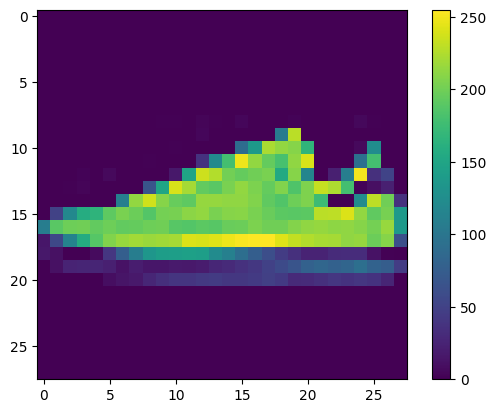

In [15]:
# 2. 数据处理
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()

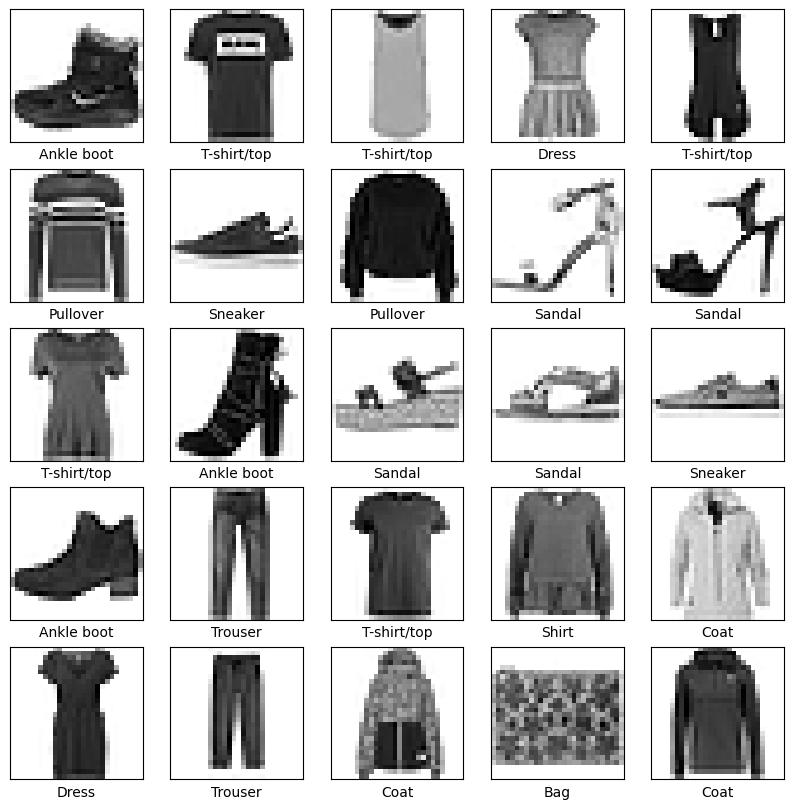

In [39]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [40]:
# 3. 构造网络
from tensorflow.keras import layers
model = tf.keras.Sequential(
[
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [42]:
# 4. 训练与验证
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0972
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0995


In [43]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026316165924072, 0.10000000149011612]

In [44]:
# 5. 预测
import numpy as np
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 [==============================] - 0s 1ms/step
[0.09944062 0.09951918 0.09903895 0.10157052 0.10080583 0.09930504
 0.09965947 0.09863392 0.10061219 0.10141426]
3
9


In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

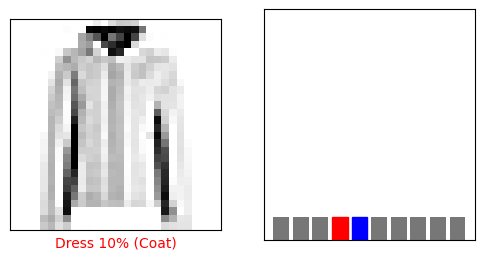

In [47]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

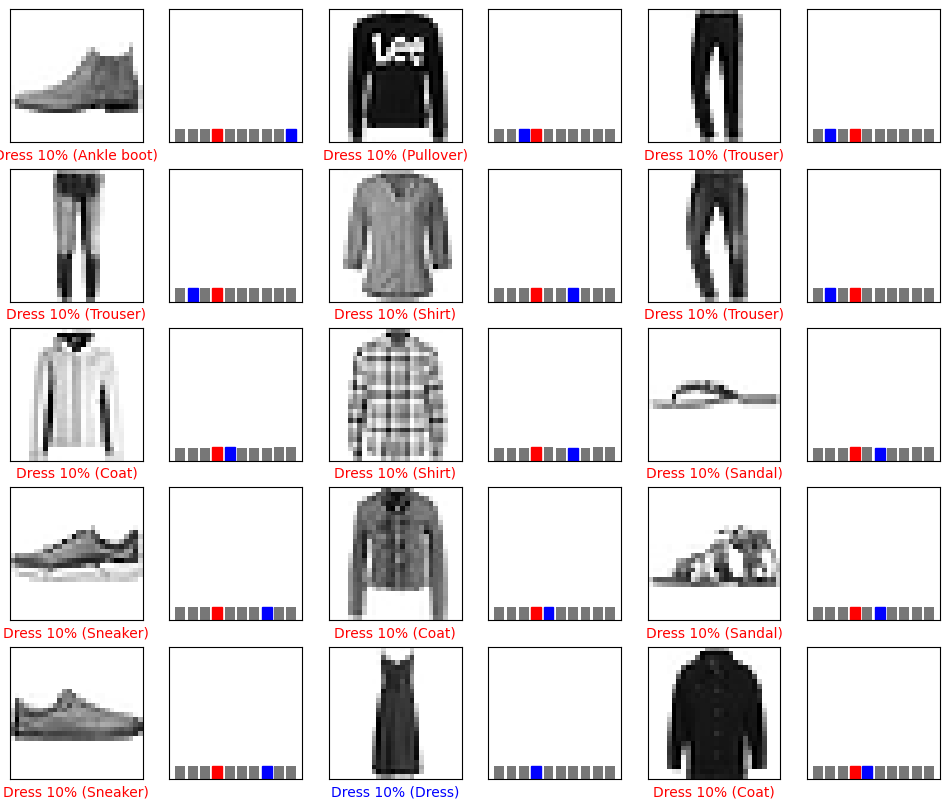

In [48]:
# 可视化结果
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()